In [2]:
# import packages
import pandas as pd
from sqlalchemy import create_engine
import os
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

In [3]:
# import files
HOME = os.path.dirname(os.getcwd())
URL = 'sqlite:///' + os.path.join(HOME, 'Database/CCS.db')

In [4]:
engine = create_engine(URL, echo = True) # sqlite:////absolute/path/to/file.db
# ALITER: engine = create_engine('sqlite:////Users/arpanganguli/Documents/Projects/SINE/Database/CCS.db', echo = True) # sqlite:////absolute/path/to/file.db

In [6]:
# initial query
query_string = "SELECT * FROM CCS"
df = pd.read_sql(sql=query_string, con=engine)
display(df.head())

2021-05-10 00:05:02,540 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("SELECT * FROM CCS")
2021-05-10 00:05:02,541 INFO sqlalchemy.engine.base.Engine ()
2021-05-10 00:05:02,543 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("SELECT * FROM CCS")
2021-05-10 00:05:02,545 INFO sqlalchemy.engine.base.Engine ()
2021-05-10 00:05:02,550 INFO sqlalchemy.engine.base.OptionEngine SELECT * FROM CCS
2021-05-10 00:05:02,551 INFO sqlalchemy.engine.base.OptionEngine ()


,Index,Round,Period,City,Age,Gender,Annual Income,Assembly Constituency Name,Educational Qualification,No. of Family Members,...,Perception on essential spending - compared to one year ago,Outlook on essential spending - one year ahead,Perception on non-essential spending - compared to one year ago,Outlook on non-essential spending - one year ahead,Perception on Employment scenario - compared to one year ago,Outlook on Employment scenario - one year ahead,Perception on General prices - compared to one year ago,Outlook on General prices - one year ahead,Perception on Inflation - compared to one year ago,Outlook on Inflation - one year ahead
0,0,23.0,2015-03-31 00:00:00.000000,Bengaluru,22-29 year,Female,Rs. 1 lakh or less,Batarayanapura,Below graduate,5 and more,...,Increased,Will increase,Increased,Will increase,Improved,Will improve,Increased,Will increase,Increased,Will increase
1,1,23.0,2015-03-31 00:00:00.000000,Bengaluru,22-29 year,Female,Rs. 1 lakh or less,Batarayanapura,Below graduate,5 and more,...,Increased,Will increase,Decreased,Will decrease,Improved,Will improve,Decreased,Will increase,None,Will increase
2,2,23.0,2015-03-31 00:00:00.000000,Bengaluru,22-29 year,Female,Rs. 1 lakh or less,Batarayanapura,Graduate & above,5 and more,...,Increased,Will increase,Decreased,Will decrease,Worsened,Remain the same,Increased,Will increase,Increased,Will increase
3,3,23.0,2015-03-31 00:00:00.000000,Bengaluru,22-29 year,Female,Rs. 1 lakh or less,Batarayanapura,Up to primary,3 or 4,...,Increased,Will increase,Decreased,Will decrease,Improved,Will improve,Increased,Will increase,Increased,Will increase
4,4,23.0,2015-03-31 00:00:00.000000,Bengaluru,22-29 year,Female,Rs. 1 lakh or less,Batarayanapura,Up to primary,3 or 4,...,Increased,Will decrease,Decreased,Will decrease,Remained the same,Remain the same,Increased,Will increase,Increased,Will increase


In [7]:
df["Perception on essential spending - compared to one year ago"].value_counts()

Increased            141831
Remained the same     23782
Decreased              7995
Name: Perception on essential spending - compared to one year ago, dtype: int64

In [8]:
df_test = df[["Index", "Round", "Perception on essential spending - compared to one year ago"]]
display(df_test)

,Index,Round,Perception on essential spending - compared to one year ago
0,0,23.0,Increased
1,1,23.0,Increased
2,2,23.0,Increased
3,3,23.0,Increased
4,4,23.0,Increased
...,...,...,...
173635,5343,46.0,Increased
173636,5344,46.0,Increased
173637,5345,46.0,Increased
173638,5346,46.0,Remained the same


In [9]:
df_test["Perception on essential spending - compared to one year ago"].value_counts()

Increased            141831
Remained the same     23782
Decreased              7995
Name: Perception on essential spending - compared to one year ago, dtype: int64

Text(0.5, 1.0, 'Perception on essential spending - compared to one year ago')

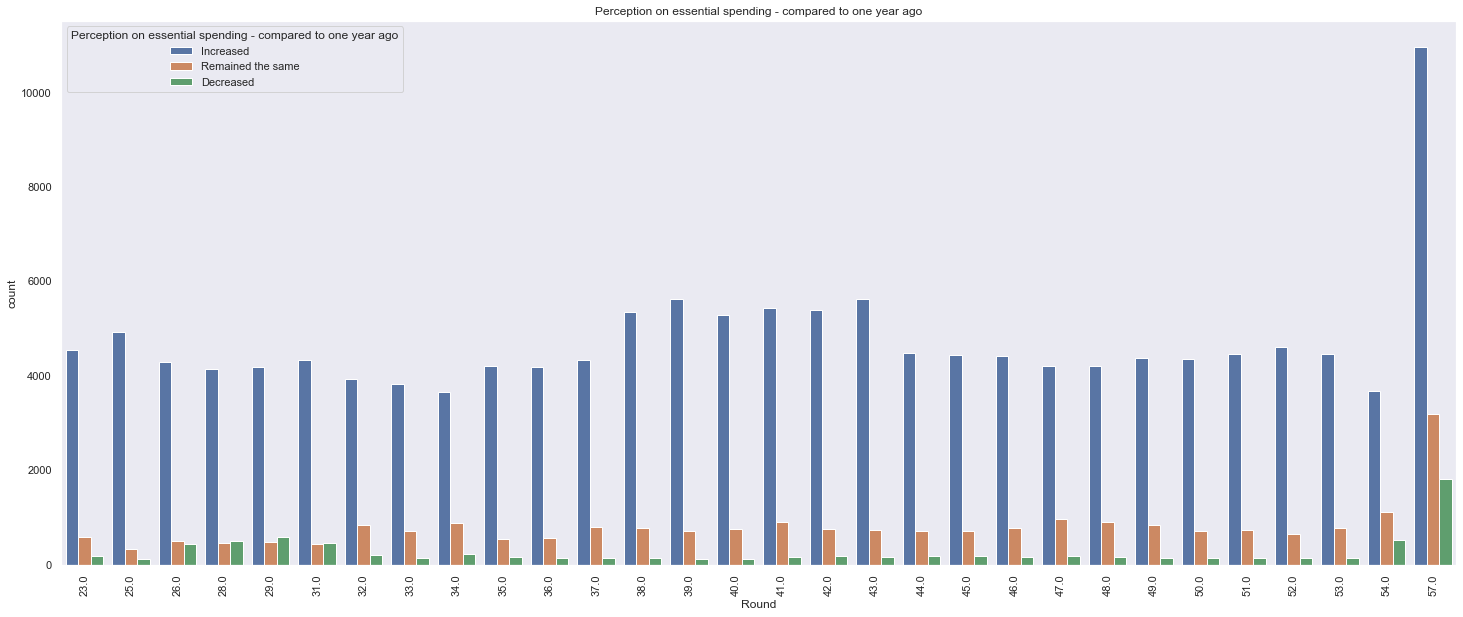

In [12]:
fig = plt.figure(figsize=(25, 10))
sns.set_style("dark")
sns.countplot(x=df_test["Round"], hue=df["Perception on essential spending - compared to one year ago"])
plt.xticks(rotation=90, label="round")
plt.title("Perception on essential spending - compared to one year ago")